In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt 


from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np

Number of original training examples: 60000
Number of original test examples: 10000
Number of filtered training examples: 12049
Number of filtered test examples: 1968


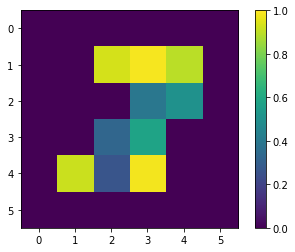

In [2]:
#import data
import collections

(x_train, y_train), (x_test, y_test) = datasets.mnist.load_data()

# Rescale the images from [0,255] to the [0.0,1.0] range.
x_train, x_test = x_train[..., np.newaxis]/255.0, x_test[..., np.newaxis]/255.0

print("Number of original training examples:", len(x_train))
print("Number of original test examples:", len(x_test))

#Take only images of 3 and 6
def filter_36(x, y):
    keep = (y == 3) | (y == 6)
    x, y = x[keep], y[keep]
    y = y == 3
    return x,y

x_train, y_train = filter_36(x_train, y_train)
x_test, y_test = filter_36(x_test, y_test)

print("Number of filtered training examples:", len(x_train))
print("Number of filtered test examples:", len(x_test))

x_train_small = tf.image.resize(x_train, (6,6)).numpy()
x_test_small = tf.image.resize(x_test, (6,6)).numpy()

def convert_label(y):
  if y==True:
    return 1.0
  else: 
    return -1.0

y_train=[convert_label(y) for y in y_train]
y_test=[convert_label(y) for y in y_test]

plt.imshow(x_train_small[0,:,:,0], vmin=0, vmax=1)
plt.colorbar()


X_train=x_train_small[:300]
X_test=x_test_small[:50]
Y_train=y_train[:300]
Y_test=y_test[:50]


x_train_4=X_train[:,1:5,1:5]
x_test_4=X_test[:,1:5,1:5]

In [3]:
cnn=tf.keras.Sequential()
cnn.add(layers.Conv2D(1,(2,2), input_shape=(4,4,1), strides=(2,2)))
cnn.add(layers.Conv2D(1,(2,2)))
cnn.add(layers.Flatten())



In [5]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 2, 2, 1)           5         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 1, 1, 1)           5         
_________________________________________________________________
flatten (Flatten)            (None, 1)                 0         
Total params: 10
Trainable params: 10
Non-trainable params: 0
_________________________________________________________________


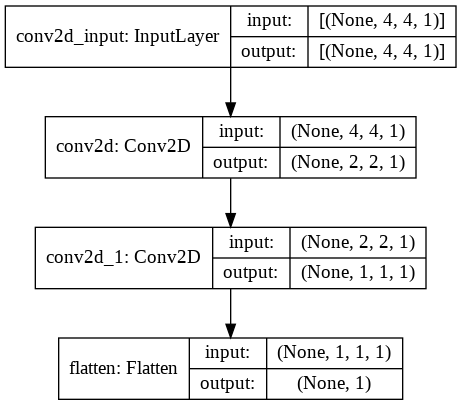

In [6]:
tf.keras.utils.plot_model(cnn, show_shapes=True)

In [7]:
def hinge_accuracy(y_true, y_pred):
    y_true = tf.squeeze(y_true) > 0.0
    y_pred = tf.squeeze(y_pred) > 0.0
    result = tf.cast(y_true == y_pred, tf.float32)

    return tf.reduce_mean(result)




In [8]:
cnn.compile(optimizer=tf.keras.optimizers.Adam(), loss=tf.losses.Hinge(), metrics=[hinge_accuracy])


In [9]:
history=cnn.fit(x=x_train_4, y=np.asarray(Y_train), batch_size=16, epochs=25, verbose=1, validation_data=(x_test_4, np.asarray(Y_test)))

Epoch 1/25
19/19 [==============================] - 1s 28ms/step - loss: 0.9464 - hinge_accuracy: 0.5557 - val_loss: 1.0592 - val_hinge_accuracy: 0.3594
Epoch 2/25
19/19 [==============================] - 0s 4ms/step - loss: 0.9651 - hinge_accuracy: 0.5377 - val_loss: 1.0490 - val_hinge_accuracy: 0.3594
Epoch 3/25
19/19 [==============================] - 0s 4ms/step - loss: 0.9271 - hinge_accuracy: 0.5865 - val_loss: 1.0393 - val_hinge_accuracy: 0.3594
Epoch 4/25
19/19 [==============================] - 0s 3ms/step - loss: 0.9706 - hinge_accuracy: 0.5334 - val_loss: 1.0289 - val_hinge_accuracy: 0.3438
Epoch 5/25
19/19 [==============================] - 0s 4ms/step - loss: 0.9738 - hinge_accuracy: 0.5266 - val_loss: 1.0191 - val_hinge_accuracy: 0.3594
Epoch 6/25
19/19 [==============================] - 0s 4ms/step - loss: 0.9312 - hinge_accuracy: 0.5814 - val_loss: 1.0105 - val_hinge_accuracy: 0.3750
Epoch 7/25
19/19 [==============================] - 0s 4ms/step - loss: 0.8813 - hinge_

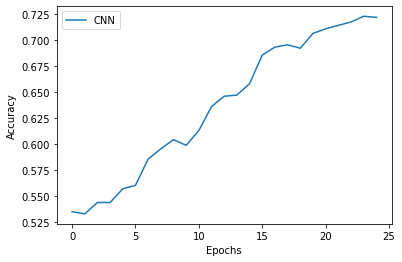

In [12]:
plt.plot(history.history['hinge_accuracy'], label='CNN')
#plt.plot(hybrid_history.history['val_custom_accuracy'], label='Hybrid CNN')
#plt.title('Quantum vs Hybrid CNN performance')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Accuracy')
plt.show()

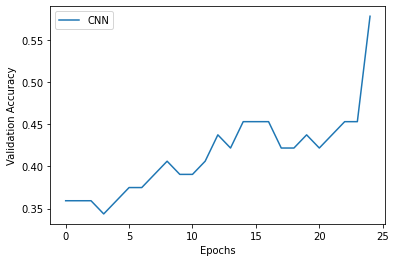

In [13]:
plt.plot(history.history['val_hinge_accuracy'], label='CNN')
#plt.plot(hybrid_history.history['val_custom_accuracy'], label='Hybrid CNN')
#plt.title('Quantum vs Hybrid CNN performance')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Validation Accuracy')
plt.show()

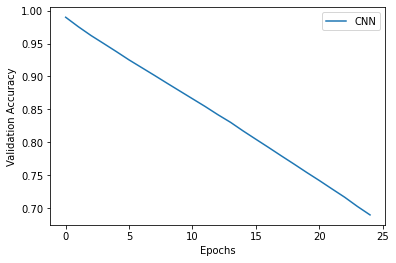

In [14]:
plt.plot(history.history['loss'], label='CNN')
#plt.plot(hybrid_history.history['val_custom_accuracy'], label='Hybrid CNN')
#plt.title('Quantum vs Hybrid CNN performance')
plt.xlabel('Epochs')
plt.legend()
plt.ylabel('Validation Accuracy')
plt.show()